In [1]:
using LinearAlgebra 
using Kronecker
using MKL
using Plots, PyPlot
using Random, Distributions
using RandomMatrices


(process:14852): GLib-GIO-WARNING **: 13:26:29.252: Unexpectedly, UWP app `KDEe.V.Okular_22.801.1132.0_x64__7vt06qxq7ptv8' (AUMId `KDEe.V.Okular_7vt06qxq7ptv8!KDEe.V.Okular') supports 5 extensions but has no verbs


In [2]:
#Defining the Basic Gates



#The X,Y,Z gates:

X = [0 1 ; 1 0 ];
Y = [0 -1im ; im 0 ];
Z = [1 0 ; 0 -1 ];

# The Hadamard and the Phase Gates:

H=1/sqrt(2)*[1 1 ; 1 -1];
S=[1 0; 0 im];
T=[1 0; 0 exp(im*pi/4)];


#The finite X,Y,Z Rotations:


function RX(r)
    exp(-im*r/2*X)
end


function RY(r)
    exp(-im*r/2*Y)
end


function RZ(r)
    exp(-im*r/2*Z)
end


#The two-body gates:

CNOT=[1 0 0 0; 0 1 0 0; 0 0 0 1; 0 0 1 0];
REVCNOT=kronecker(H, H)*CNOT*kronecker(H, H);

In [3]:
#The Random Field (Note the required Nesting):



RH=fill(fill(0.1+im, 4,4), 6);  #NOTE: These two are Random Hermitian at this stage
RU=fill(fill(0.1+im, 4,4), 6);  #NOTE: These will be generated later from above


#Generating a GUE:

l = Normal(0, 0.50);   #off diagonal elements
d = Normal(0, 1.00);   #diagonal elements


for j in 1:length(RU)
     
    A=rand(l,4,4)+im*rand(l,4,4);
    for i in 1:dim(A)
        A[i,i]=rand(d)+im*rand(d);
    end
    
#Symmetrisation:
    
    RH[j]=(A+A')/2;
    
end


In [4]:
o=pi;
h=rand(12)*2*pi;
XRow=copy(kronecker(RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o)));
ZRow=copy(kronecker(RZ(h[1]),RZ(h[2]),RZ(h[3]),RZ(h[4]),RZ(h[5]),RZ(h[6]),RZ(h[7]),RZ(h[8]),RZ(h[9]),RZ(h[10]),RZ(h[11]),RZ(h[12])));


In [1]:

FU=fill(fill(0.1+im, 4,4), 6);

    
    alpha=0.31;
       
    for j in 1:length(RU)
        FU[j]=exp(im*alpha*RH[j]);
    end
       
    
#    for j in 1:length(FU)
#        FU[j]=CNOT*kronecker(RU[j],RU[j+6])*CNOT;
#    end
    
    
    
    UOdd=copy(kronecker(FU[1],FU[2],FU[3],FU[4],FU[5],FU[6]));
    UEven=copy(kronecker(I(2),FU[2],FU[3],FU[4],FU[5],FU[6],I(2)));


    A=XRow*ZRow
    
   
 
    
    
EigA=eigvals(A);

N=fill(0.1,length(EigA))
N=angle.(EigA);

N= sort(N,rev=true);


EigA1=copy(N);
ls = deleteat!(EigA1,1);
la = deleteat!(N,length(N));
m=copy(la-ls)/mean(la-ls)

histogram(m)

LoadError: UndefVarError: RU not defined

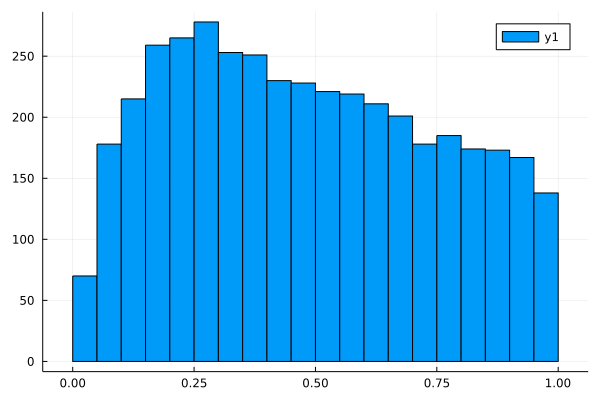

In [17]:

n=fill(0.1,length(EigA)-2);

for i in 1:length(n)
    #n[i]=m[i+1]/m[i];
    n[i]= minimum([m[i], m[i+1]])/maximum([m[i], m[i+1]]);
end

histogram(n)

In [11]:
mean(n)

LoadError: UndefVarError: n not defined

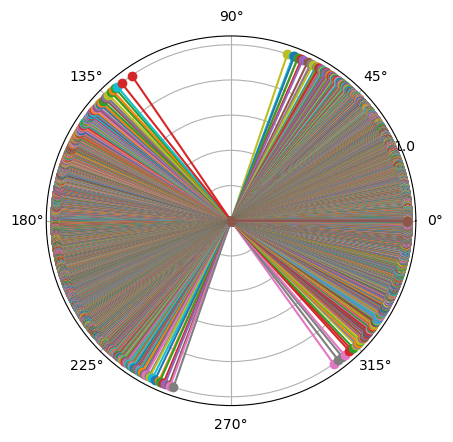

4096-element Vector{Vector{PyCall.PyObject}}:
 [PyObject <matplotlib.lines.Line2D object at 0x00000000AAA3FCA0>]
 [PyObject <matplotlib.lines.Line2D object at 0x00000000AAA3D330>]
 [PyObject <matplotlib.lines.Line2D object at 0x00000000AAA3D1B0>]
 [PyObject <matplotlib.lines.Line2D object at 0x00000000AAA3D150>]
 [PyObject <matplotlib.lines.Line2D object at 0x00000000AAA3D510>]
 [PyObject <matplotlib.lines.Line2D object at 0x00000000AAA3C820>]
 [PyObject <matplotlib.lines.Line2D object at 0x00000000BDEEDA80>]
 [PyObject <matplotlib.lines.Line2D object at 0x00000000BDEEE410>]
 [PyObject <matplotlib.lines.Line2D object at 0x00000000BDEEDE10>]
 [PyObject <matplotlib.lines.Line2D object at 0x00000000BDEEE920>]
 [PyObject <matplotlib.lines.Line2D object at 0x00000000BDEEC1F0>]
 [PyObject <matplotlib.lines.Line2D object at 0x00000000BDEED3C0>]
 [PyObject <matplotlib.lines.Line2D object at 0x00000000AAA3C3A0>]
 ⋮
 [PyObject <matplotlib.lines.Line2D object at 0x00000000D0852770>]
 [PyObject <m

In [10]:
polar.(Base.vect.(0.0,angle.(EigA)),Base.vect.(0.0,abs.(EigA)),marker="o")

In [47]:
gr();
 
#plot
histogram(m)

#save plot
Plots.savefig("fig/X-ZRow-MBL-Alpha=0.11-s.png")

In [48]:
gr();
 
#plot
histogram(n)

#save plot
Plots.savefig("fig/X-ZRow-MBL-Alpha=0.11-s.png")

In [53]:
xax=1:12
gr();
 
#plot
Plots.plot(xax,h)

#save plot
Plots.savefig("fig/Disorder.png")

DTC

In [6]:
Zi=fill(fill(0.1+im, 4096,4096), 12);



Zi[1]=copy(kronecker(Z,I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2)));
Zi[2]=copy(kronecker(I(2),Z,I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2)));
Zi[3]=copy(kronecker(I(2),I(2),Z,I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2)));
Zi[4]=copy(kronecker(I(2),I(2),I(2),Z,I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2)));
Zi[5]=copy(kronecker(I(2),I(2),I(2),I(2),Z,I(2),I(2),I(2),I(2),I(2),I(2),I(2)));
Zi[6]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),Z,I(2),I(2),I(2),I(2),I(2),I(2)));
Zi[7]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),I(2),Z,I(2),I(2),I(2),I(2),I(2)));
Zi[8]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),I(2),I(2),Z,I(2),I(2),I(2),I(2)));
Zi[9]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),Z,I(2),I(2),I(2)));
Zi[10]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),Z,I(2),I(2)));
Zi[11]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),Z,I(2)));
Zi[12]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),Z));

In [7]:
Cii=fill(0.1, 12,25);

In [ ]:
At=I(4096);
for t in 1:25
    for l in 1:12
        LM=copy(Zi[l]*At*Zi[l]);
        Cii[l,t]=real(LM[1365,1365]);
    end
    At=A*At;
end

In [ ]:
xax=1:25
Plots.plot(xax,Cii[5,:])

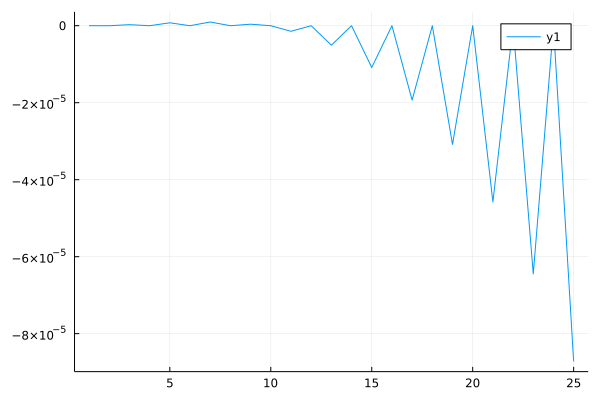

In [23]:
Plots.plot(xax,Cii[3,:])

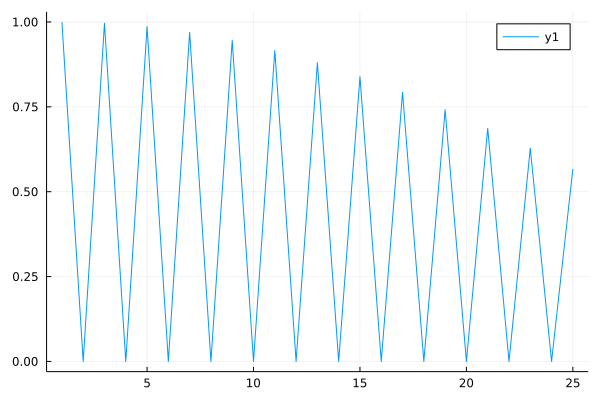

In [24]:
Plots.plot(xax,Cii[4,:])

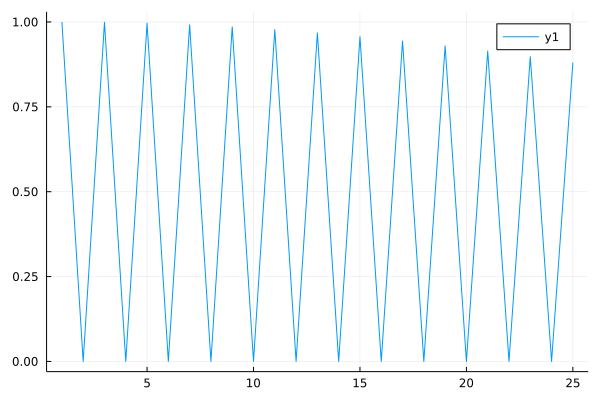

In [25]:
Plots.plot(xax,Cii[5,:])

In [34]:
eigvals(Z*RX(pi)*Z)

2-element Vector{ComplexF64}:
 1.1102230246251565e-16 - 1.0im
 1.1102230246251565e-16 + 0.9999999999999997im